# Lab 1 - Python Review with Time Domain Filtering

Team Members: Logan Aikas, Katie Sullivan, Victor Li

In [115]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display

# 1) Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## Implementing a Mean Filter

The time window size used was  41.0 ms


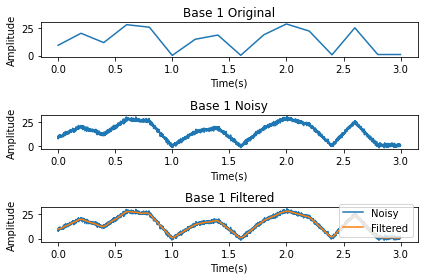

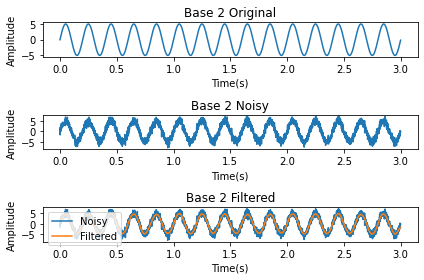

In [121]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds (3000 is length)
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi

# here are some base signals to work with
#both have length 3000
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
base2 = 5*np.sin(2*pi*5*time)



#get the max value from both of the base signals

max_noise_val = np.max([np.max(base1), np.max(base2)])

# create some random noise to be added to the above base signals

noise = np.random.normal(0,1,len(base1)) 

# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

# implement the running mean filter



#TO DO: finish your implementation of the running mean filter

def running_mean_filter(input_signal, window_size):
    
    return_signal = np.zeros(len(input_signal))
    
    for index in range(len(input_signal)):
        
        #initially set both high and low limit
        #to the current index
        #this is because for indices where
        #the window is out of bounds 
        #when centered around this index, 
        #the window may not span the desired size
        low_index = index
        high_index = index
        
        if((low_index - window_size) < 0):
            low_index = 0
        else:
            low_index = index - window_size
        if((high_index + window_size) >= len(input_signal)):
            high_index = len(input_signal)-1
        else:
            high_index = index + window_size
        
        #define the window
        #the +1 is needed to include the high index
        window = input_signal[low_index:high_index+1]
        
        
        average = np.average(window)
        
        return_signal[index] = average
        
    return return_signal


k = 20

filtered_base_1 = running_mean_filter(signal1, k)
filtered_base_2 = running_mean_filter(signal2, k)

        
        

# # compute the time window size in ms and print it

samples_per_window = (2*k)+1

windowsize = samples_per_window*(1/srate)*1000
# # slides across the signal in ms
print("The time window size used was ",windowsize,"ms")

# TO DO: plot the required plots

# For base signal 1:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference


fig1 = plt.figure(1)

plt.subplot(3,1,1)
plt.title("Base 1 Original")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, base1)



plt.subplot(3,1,2)
plt.title("Base 1 Noisy")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, signal1)


plt.subplot(3,1,3)
plt.title("Base 1 Filtered")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, signal1, label="Noisy")
plt.plot(time, filtered_base_1, label="Filtered")
plt.legend()
plt.tight_layout()




fig2 = plt.figure(2)

plt.subplot(3,1,1)
plt.title("Base 2 Original")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, base2)



plt.subplot(3,1,2)
plt.title("Base 2 Noisy")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, signal2)


plt.subplot(3,1,3)
plt.title("Base 2 Filtered")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, signal2, label="Noisy")
plt.plot(time, filtered_base_2, label="Filtered")
plt.legend()
plt.ylim
plt.tight_layout()




# For base signal 2:
# In a single plot and three subplots, plot the original signal, noisy signal and 
# filtered signal overliad on the noisy signal to see the difference

## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**

As you amplify the noise more you distort the result of the filtered signal more and more. Increasing the value of k results in a smoother filtered signal, but it comes at the cost of losing the shape of the signal. Decreasing k will retrieve a more accurate shape of the signal you are filtering, but it will also pick up more of the noise and result in a less smooth signal. Depending on the noise and type of base signal there is an ideal k value that reduces the noise but maintains the shape. 


**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**

If the noise has an amplitude that is significantly larger than the signal you want to recover there is no real way to get it back. Essentially the noise will drown out your original signal because the shape of the output will rely more heavily on the noise. Also if there is an extremely rapid rapid change, that is similar to an impulse, you will get an inaccurate shape of the signal when the window considers that impulse in the average. Therefore a major drawback of the mean filter in analyzing noisy time-series is that any large amplitude spike can cause error in the vertical shape of the filtered signal.

## Implementing a Median Filter to Remove Spikes

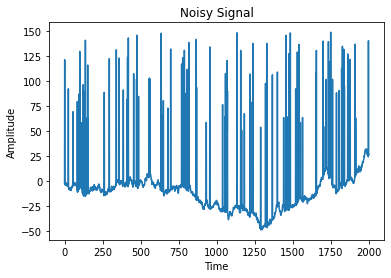

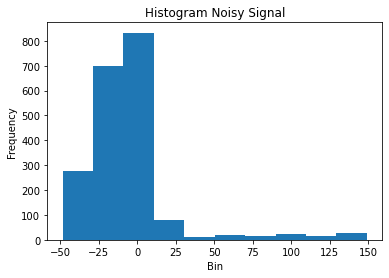

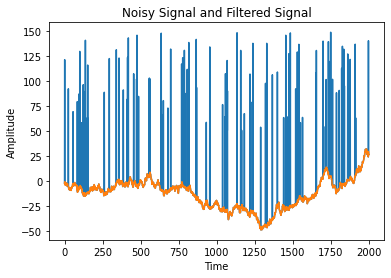

In [117]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.title("Noisy Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n),signal)




# use hist to pick threshold
fig4 = plt.figure(4)
plt.title("Histogram Noisy Signal")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.hist(signal)


# visual-picked threshold
threshold = 40


# find data values above the threshold
#let a 1 denote a value past the threshold
suprathresh = np.where(signal > threshold)[0]


# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0,len(suprathresh)):

    index = suprathresh[ti]
    low_index = index
    high_index = index

    if((low_index - k) < 0):
        low_index = 0
    else:
        low_index = index - k
    if((high_index + k) >= len(signal)):
        high_index = len(signal)-1
    else:
        high_index = index + k

    #define the window
    #the +1 is needed to include the high index
    window = signal[low_index:high_index+1]


    median = np.median(window)

    filtsig[index] = median

# for index in range(0,len(suprathresh)):   
    
    

# TO DO: plot your results as directed

fig5 = plt.figure(5)

plt.subplot(1,1,1)
plt.title("Noisy Signal and Filtered Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n), signal)
plt.plot(range(0,n), filtsig)




## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

The mean filter is better at filtering noise that is generally not too much louder than the original signal and when that noise is consistently occuring throughout the signal (E.G. not rapidly occurring noise). This is because it is good at smoothing out the general shape of the curve when the noise is at a consistent level, and not large rapid spikes. The mean filter performs poorly when there are rapid spikes occurring in the data, these spikes tend to cause the mean filter create a lot of unwanted noise in the filtered signal, and the general shape of the original signal becomes skewed along the vertical axis.

The median filter is perfect for handling rapidly occurring large spikes that are outliers of the data. By having a known threshold value chosen, the median filter is able to effectively filter out large spikes by taking the median of a window relative to the spikes that pass the threshold. The major disadvantage to the median filter is that when you have data with noise that isn't too large relative to the original signal, it is hard to choose an accurate threshold becaues the noise is so close in amplitude to the original signal. This means that ultimately if a low threshold is chosen you risk filtering out some of the original signal since it's unclear where the cutoff between noise and signal is. And if you choose to high of a threshold you may not filter out all of the noise.

## Denoising an EMG signal

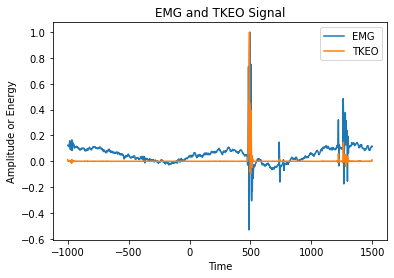

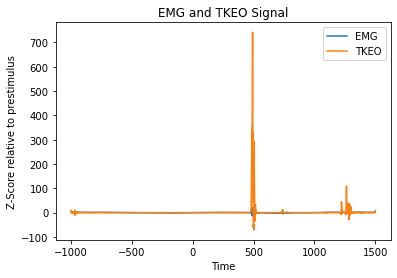

In [118]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]


# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored

# apply the TKEO algorithm
#The TKEO algorithm is given as yt=(x(t))^2−(x(t+1)*(x(t−1))
    

# # TO DO: You can implement this with a for loop or use a vectorized approach

for t in range(len(emg)):
    
    #there is no x_t-1  at t = 0 and no x_t+1 at t  = len(emg)-1
    #so nothing to subtract
    if(t == 0 or t == len(emg)-1):
        emgf[t] = emg[t]**2
    else:
        emgf[t] = emg[t]**2 - (emg[t-1]*emg[t+1])

        

fig6 = plt.figure(6)


plt.subplot(1,1,1)
plt.title("EMG and TKEO Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude or Energy")
#normalize each by dividing by their max values
plt.plot(emgtime, emg/(np.ones(len(emg))*np.max(emg)), label="EMG")
plt.plot(emgtime, emgf/(np.ones(len(emgf))*np.max(emgf)), label="TKEO")
plt.legend()

# convert both signals to zscore

# find timepoint zero

#use absolute value to not consider negative values as min
time0 = np.argmin(np.abs(emgtime))


left_mean_orig = np.ones(len(emg))*np.average(emg[0:time0+1])

left_stand_dev_orig =  np.ones(len(emg))*np.std(emg[0:time0+1])

left_mean_filt = np.ones(len(emgf))*np.average(emgf[0:time0+1])

left_stand_dev_filt = np.ones(len(emgf))*np.std(emgf[0:time0+1])
    
# convert original EMG to z-score from time-zero
emgZ = (emg - left_mean_orig)/left_stand_dev_orig

# TO DO:subtract the mean of the emg signal from 0 to time0 from the original emg
# and divide that by the standard deviation of the signal from 0 to time0

# same for filtered EMG energy
emgZf = (emgf - left_mean_filt)/left_stand_dev_filt




fig7 = plt.figure(7)


plt.subplot(1,1,1)
plt.title("EMG and TKEO Signal")
plt.xlabel("Time")
plt.ylabel("Z-Score relative to prestimulus")
plt.plot(emgtime, emgZ, label = "EMG")
plt.plot(emgtime, emgZf, label = "TKEO")
plt.legend()


## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**

The running mean filter and the median filter would fare poorly against the TKEO method in analysing the EMG signal. The TKEO signal excels at picking ensuring rapid spikes in the data are kept which is the muscle activity of interest. This is because when a spike occurs the TKEO value is the spike squared minus the two small values on either side and so the spike will remain. The TKEO value also is good at removing consistent values. For instance consider the sequence of data [1, 2, 3]. For the value 2 you will get (2^2) - (3 * 1) = 1. Also consider the sequence [2, 2, 2]. For the center 2 you will get (2^2) - (2*2) = 0. This is also true when there's a negative value E.G. [1, -2, 3] will give ((-2)^2) - (3*1) = 1   So the TKEO method in addition to preserving spikes is also good at smoothing out data sequences that are relatively similar in ampltiude which is obvious from the output graph. 

The running mean filter would perform this task poorly. When the window size is small you are able to keep the spikes in the filtered signal, but because the window size is small, all of the little noise is still present in the signal and so you effectively haven't really done anything to the signal, or at least nothing of significance. On the other hand if you increase the window size you can smooth out the little noise, but the problem is the spikes are introduced into the mean and the smooth signal has a shape nothing close to the original and becomes basically meaningless.

The median filter would also perform poorly. The biggest reason is that the way the median filter works is that you choose a threshold value and this threshold value helps you eliminate spikes in the data. However since the goal of denoising the EMG signal is to hold onto spike because this is where muscle activity is occuring, this type of filter would really have the opposite effect. Technically since the EMG chart has spikes in the negative and positive direction when you choose the threshold value it may be good to use absolute value. But regardless of that the median filter is good at removing spikes which is what we want to keep for the EMG signal and so it would not be of much help here.

**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**

If I had to choose one, I would definitely choose the running mean filter. Despite a lot of the noise being kept you at least will maintain the spikes for a lot of the values which is the part of the signal that represents the muscle movement. With the median filter you are specifically filtering out vital information, so it is useless. One thing to note is with the mean filter a very small window should be used, if a large window is used the spikes will distort the signal shape in a way that more spikes are introduced into the filtered signal than were present in the original. This relates to the vertical skew we mentioned earlier when using the mean filter with rapid changes of data. Another thing to point out is that using the mean filter doesn't really help out much, it is more the lesser of two poor choices since neither filter does a good job at isolating spikes.




### Mean Filter Applied to Small Noise Not Spiky Signal and Spiky Signal

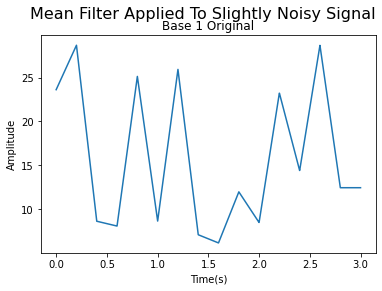

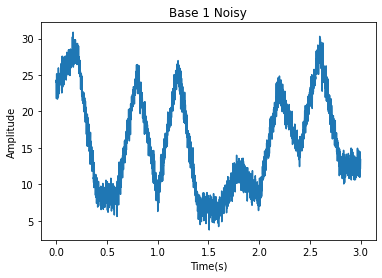

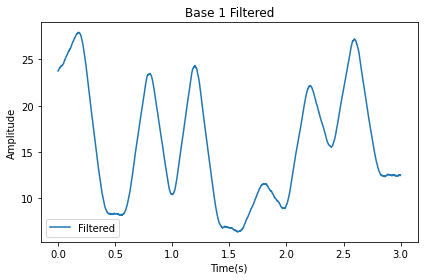

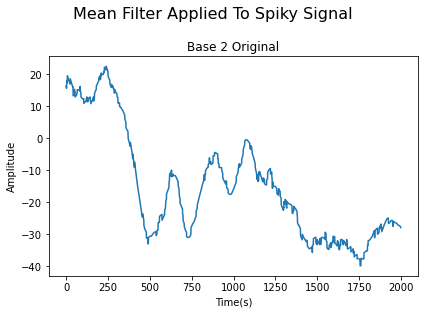

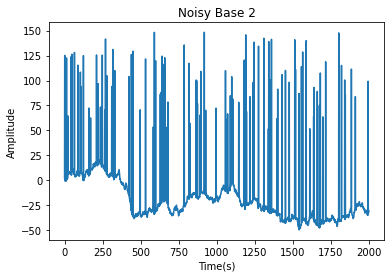

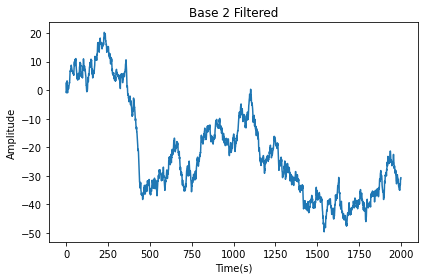

In [119]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds (3000 is length)
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi


base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise = np.random.normal(0,1,len(base1)) 

# add noise to the base signals to create new noisy signals
signal1 = base1 + noise

def running_mean_filter(input_signal, window_size):
    
    return_signal = np.zeros(len(input_signal))
    
    for index in range(len(input_signal)):
        
        low_index = index
        high_index = index
        
        if((low_index - window_size) < 0):
            low_index = 0
        else:
            low_index = index - window_size
        if((high_index + window_size) >= len(input_signal)):
            high_index = len(input_signal)-1
        else:
            high_index = index + window_size
        
        #define the window
        #the +1 is needed to include the high index
        window = input_signal[low_index:high_index+1]
        
        
        average = np.average(window)
        
        return_signal[index] = average
        
    return return_signal


k = 40

filtered_base_1 = running_mean_filter(signal1, k)

# create signal
n = 2000
signal2 = np.cumsum(np.random.randn(n))

signal2_deep_copy = copy.deepcopy(signal2)

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal2[noisepnts] = 50+np.random.rand(len(noisepnts))*100


filtered_base_2 = running_mean_filter(signal2, k)


fig12 = plt.figure(12)

fig12.suptitle('Mean Filter Applied To Slightly Noisy Signal', fontsize=16)

plt.subplot(1,1,1)
plt.title("Base 1 Original")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, base1)

fig13 = plt.figure(13)

plt.subplot(1,1,1)
plt.title("Base 1 Noisy")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(time, signal1)

fig14 = plt.figure(14)

plt.subplot(1,1,1)
plt.title("Base 1 Filtered")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
# plt.plot(time, signal1, label="Noisy")
plt.plot(time, filtered_base_1, label="Filtered")
plt.legend()
plt.tight_layout()




fig22 = plt.figure(22)

fig22.suptitle('Mean Filter Applied To Spiky Signal', fontsize=16, y = 1.08)



plt.subplot(1,1,1)
plt.title("Base 2 Original")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
# plt.plot(range(0, n), signal2)
plt.plot(range(0, n), filtered_base_2)
plt.tight_layout()


fig23 = plt.figure(23)


plt.subplot(1,1,1)
plt.title("Noisy Base 2")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(range(0, n), signal2)


fig24 = plt.figure(24)


plt.subplot(1,1,1)
plt.title("Base 2 Filtered")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(range(0, n), signal2_deep_copy)
# plt.plot(range(0, n), filtered_base_2)
plt.tight_layout()





### Median Filter Applied To Spiky Noise Signal And Small Noise Not Spiky Signal

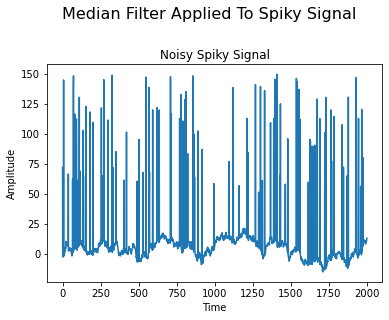

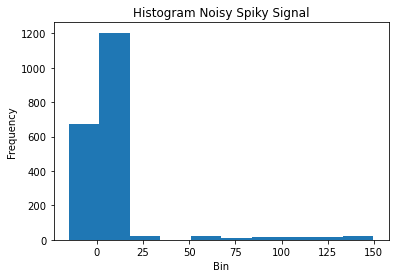

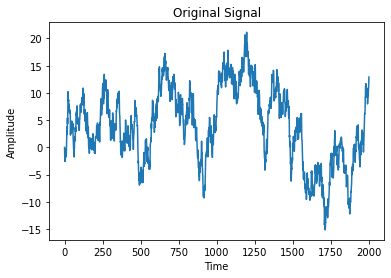

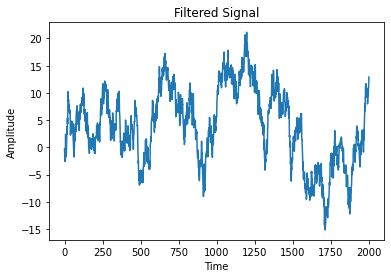

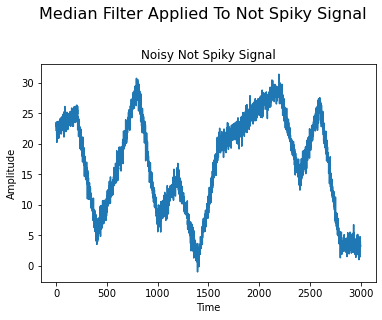

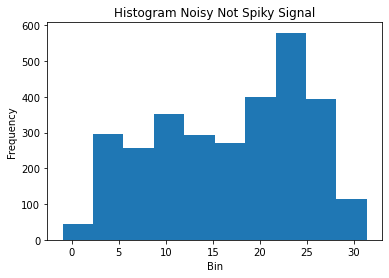

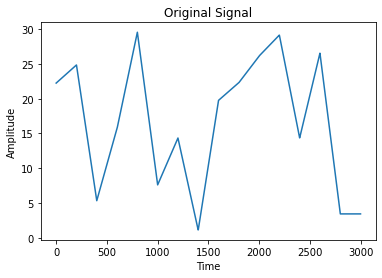

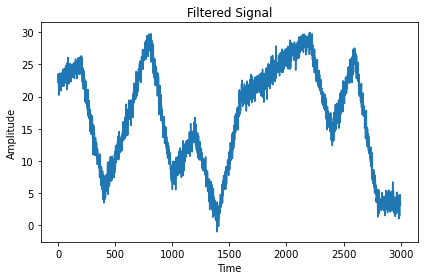

In [122]:

#Apply Median Filter to Spiky Noise Signal


# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

orig = copy.deepcopy(signal)

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100



fig321=plt.figure(321)

fig321.suptitle('Median Filter Applied To Spiky Signal', fontsize=16, y = 1.08)

plt.title("Noisy Spiky Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n),signal)




# use hist to pick threshold
fig444 = plt.figure(444)
plt.title("Histogram Noisy Spiky Signal")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.hist(signal)


# visual-picked threshold
threshold = 40


# find data values above the threshold
#let a 1 denote a value past the threshold
suprathresh = np.where(signal > threshold)[0]



# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0,len(suprathresh)):

    index = suprathresh[ti]
    low_index = index
    high_index = index

    if((low_index - k) < 0):
        low_index = 0
    else:
        low_index = index - k
    if((high_index + k) >= len(signal)):
        high_index = len(signal)-1
    else:
        high_index = index + k

    #define the window
    #the +1 is needed to include the high index
    window = signal[low_index:high_index+1]


    median = np.median(window)

    filtsig[index] = median

# for index in range(0,len(suprathresh)):   
    
    

# TO DO: plot your results as directed

fig5 = plt.figure(5)

plt.subplot(1,1,1)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n), orig)
# plt.plot(range(0,n), filtsig)

fig522 = plt.figure(522)

plt.subplot(1,1,1)
plt.title("Filtered Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.plot(range(0,n), signal)
plt.plot(range(0,n), filtsig)






#Apply Median Filter to Not Spiky Noise Signal



srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds (3000 is length)
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi


base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise = np.random.normal(0,1,len(base1)) 


signal1 = base1 + noise



fig33333=plt.figure(33333)

fig33333.suptitle('Median Filter Applied To Not Spiky Signal', fontsize=16, y = 1.08)

plt.title("Noisy Not Spiky Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n),signal1)




# use hist to pick threshold
fig4 = plt.figure(4)
plt.title("Histogram Noisy Not Spiky Signal")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.hist(signal1)


# visual-picked threshold
threshold = 30


# find data values above the threshold
#let a 1 denote a value past the threshold
suprathresh = np.where(signal1 > threshold)[0]


filtsig = copy.deepcopy(signal1)


k = 20 # actual window is k*2+1
for ti in range(0,len(suprathresh)):

    index = suprathresh[ti]
    low_index = index
    high_index = index

    if((low_index - k) < 0):
        low_index = 0
    else:
        low_index = index - k
    if((high_index + k) >= len(signal1)):
        high_index = len(signal1)-1
    else:
        high_index = index + k

    window = signal1[low_index:high_index+1]


    median = np.median(window)

    filtsig[index] = median


fig55 = plt.figure(55)

plt.subplot(1,1,1)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n), base1)


fig57 = plt.figure(57)

plt.subplot(1,1,1)
plt.title("Filtered Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(range(0,n), filtsig)


plt.tight_layout()